In [1]:
#Modèle de départ de la simulation
import numpy as np
import random
import matplotlib.pyplot as plt
import copy
import tkinter as tk

### Base du modèle (version SIMPLE)
Le modèle consiste en une parcelle de terrain carrée dans laquelle se situe une population de plantes. Chaque jour, les plantes sont arrosées et on suppose qu'aucune espèce envahissante ne perturbe la croissance de l'espèce. <br/>
Chaque individu de la population sera représenté par un chiffre (*float*) qui indiquera son "âge" (ou son état de vie). <br/>
- 0.0 correspond à une surface vide; <br/>
- 0.5 correspond a une germe qui a été inséré dans la surface; <br/>
- Une valeur dans l'intervalle {1.0 ; 2.0} décrit le cycle de vie de la plante (1.0 étant son éclosion et 2.0 la "veille" de sa mort (l'individu est encore fertile) pour simplifier le modèle). <br/> <br/>
De plus, on notera un indicateur "P" (PLEIN), "M" (MOITIE) et "V" (VIDE) qui informera sur la réserve de nectar d'un individu (il faut 2 jours à un individu pour "remplir ses réserves").

In [2]:
#Parcelle carrée dont on connaît le côté
def init_parcelle(n):
    return [[[0.0, " "] for i in range(n)]for j in range(n)]
#Coordonnées d'une plante = parcelle[x][y]
#ex : plante n*(4,5) = parcelle[4][5]

#Détermine si la parcelle est vide (False = la parcelle n'est PAS VIDE)
def bool_parcelle_vide(parcelle, taille) :
    for i in range(taille) :
        for j in range(taille) :
            if parcelle[i][j][0] != 0.0 :
                return False
    return True

#Détermine si la parcelle contien un individu mature (False = la parcelle CONTIENT un individu mature)
def bool_parcelle_sans_plantes_matures(parcelle, taille) :
    for i in range(taille) :
        for j in range(taille) :
            if parcelle[i][j][0] >= 1.25 :
                return False
    return True

In [3]:
parcelle_depart = init_parcelle(10)
parcelle_depart

[[[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],

In [4]:
def apparition_individu(parcelle, coord_plante):
    #Simule l'apparition d'une plante représentée par un 1 dans le tableau parcelle
    abscice_fleur, ordonnee_fleur = coord_plante
    parcelle[abscice_fleur][ordonnee_fleur]= [1.0, " "]
    
def apparition_pollen(parcelle, coord_plante):
    #Simule l'apparition d'un grain de pollen représenté par un 0.6 dans le tableau parcelle
    abscice_fleur, ordonnee_fleur = coord_plante
    parcelle[abscice_fleur][ordonnee_fleur]= [0.5, " "]

In [5]:
apparition_individu(parcelle_depart, (1,1))
apparition_pollen(parcelle_depart, (0,0))
parcelle_depart

[[[0.5, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [1.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],

In [6]:
def parcelle_remplie(parcelle, liste_coord):
    #Remplit la parcelle avec les fleurs dont les coordonnées sont les éléments de liste_coor
    for i in range(len(liste_coord)):
        apparition_individu(parcelle, liste_coord[i])

In [7]:
liste_coord = [(1, 2), (0, 1)]
parcelle_remplie(parcelle_depart, liste_coord)
parcelle_depart

[[[0.5, ' '],
  [1.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [1.0, ' '],
  [1.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],

### Implémentation de la mort d'un individu et du passage du jour
Chaque individu a une durée de vie de 4 jours (qu'on pourra modifier au préalable)

In [8]:
def tue_surface(parcelle, coord):
    #Simule la mort de la plante sur la surface de coordonnées coord dans la parcelle 
    x, y = coord
    parcelle[x][y] = [0.0, " "]

In [9]:
def passage_jour(parcelle, taille):
    #Simule le passage d'une journée sur la parcelle
    for i in range(0, taille):
        for j in range(0, taille):
            if parcelle[i][j][0] == 0.5 :
                parcelle[i][j] = [1.0, " "]
            elif 1.0 <= parcelle[i][j][0] < 2.0 :
                if parcelle[i][j][1] == " " or parcelle[i][j][1] == "V" :
                    parcelle[i][j][1] = "M"
                elif parcelle[i][j][1] == "M" :
                    parcelle[i][j][1] = "P"
                parcelle[i][j][0] += 0.25
            elif parcelle[i][j][0] == 2.0 :
                tue_surface(parcelle, (i,j))

In [10]:
passage_jour(parcelle_depart, 3)
parcelle_depart
passage_jour(parcelle_depart, 3)
parcelle_depart
passage_jour(parcelle_depart, 3)
parcelle_depart

[[[1.5, 'P'],
  [1.75, 'P'],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [1.75, 'P'],
  [1.75, 'P'],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' 

### Implémentation des pollinisateurs
- Vent (aléatoire); <br/>
- Abeilles (semi_aléatoire); <br/>
- Humain (contrôlé).

### VENT

In [11]:
def direction_alea_vent() :
    #Détermine une direction aléatoire (Nord, Sud, Est, Ouest) dans laquelle souffle le vent
    val_rand = random.randint(1, 4)
    if val_rand == 1 :
        return "N"
    if val_rand == 2 :
        return "E"
    if val_rand == 3 :
        return "S"
    if val_rand == 4 :
        return "O"

direction_alea_vent()

'O'

### Critères de la dispersion par le vent
1) La fonction cherche au hasard une plante qui est arrivée à maturité (>1.25) et une direction dans laquelle le vent souffle <br/>
2) Elle calcule les coordonnées d'une surface sur laquelle déposer le germe de la plante émettrice (elle ne cherche q'**UNE FOIS** un emplacement, si cet emplacement n'est pas libre/en dehors de la parcelle, la pollinisation ne se fait pas) <br/>
3) Le germe est déposé dans la surface obtenue (0.5) et devra croître pour donner une nouvelle plante
<br/>
<br/>
**AINSI, ON CONTRÔLERA LA FORCE DU VENT EN APPLIQUANT PLUSIEURS FOIS LA FONCTION (le nombre de répétitions correspond à l'index de la force du vent)**

In [12]:
def dispersion_vent(parcelle, taille, sens_vent, force_souffle) :
    #Simule la dispersion des grains de pollens des plantes arrivées à maturité par le vent 
    for i in range(force_souffle) :
        x_plante_emettrice = random.randint(0, taille-1)
        y_plante_emettrice = random.randint(0, taille-1)
        while parcelle[x_plante_emettrice][y_plante_emettrice][0] < 1.25 :
            x_plante_emettrice = random.randint(0, taille-1)
            y_plante_emettrice = random.randint(0, taille-1)   
        if sens_vent == "N" :
            x_recepteur = random.randint(0, max(0,x_plante_emettrice-1))
            y_recepteur = y_plante_emettrice
            if (parcelle[x_recepteur][y_recepteur][0] == 0.0) :
                parcelle[x_recepteur][y_recepteur] = [0.5, " "]
        elif sens_vent == "E" :
            x_recepteur = x_plante_emettrice
            y_recepteur = random.randint(min(taille-1, y_plante_emettrice+1), taille-1)
            if (parcelle[x_recepteur][y_recepteur][0] == 0.0) :
                parcelle[x_recepteur][y_recepteur] = [0.5, " "]
        elif sens_vent == "S" :
            x_recepteur = random.randint(min(taille-1, x_plante_emettrice+1), taille-1)
            y_recepteur = y_plante_emettrice
            if (parcelle[x_recepteur][y_recepteur][0] == 0.0) :
                parcelle[x_recepteur][y_recepteur] = [0.5, " "]
        elif sens_vent == "O" :
            x_recepteur = x_plante_emettrice
            y_recepteur = random.randint(0, max(0, y_plante_emettrice-1))
            if (parcelle[x_recepteur][y_recepteur][0] == 0.0) :
                parcelle[x_recepteur][y_recepteur] = [0.5, " "]

In [13]:
dispersion_vent(parcelle_depart, 10, direction_alea_vent(), 10)
parcelle_depart

[[[1.5, 'P'],
  [1.75, 'P'],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.5, ' '],
  [0.5, ' '],
  [0.0, ' '],
  [0.5, ' ']],
 [[0.0, ' '],
  [1.75, 'P'],
  [1.75, 'P'],
  [0.5, ' '],
  [0.0, ' '],
  [0.5, ' '],
  [0.5, ' '],
  [0.5, ' '],
  [0.5, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' 

### ABEILLES

### Critères de la pollinisation par les abeilles
1) On libère un nombre d'abeilles que l'utilisateur définit dans la parcelle; <br/>
2) Chaque abeille visite un individu **mature** au hasard (par simplicité), se nourrit du nectar de la plante et collecte son pollen (on notera que si il y a plus d'abeilles que d'inidividu, certaines abeilles ne feront "rien"); <br/>
3) L'abeille dépose le pollen récupéré sur une surface comprise dans un rayon de 2 surface ("2 case dans le tableau, selon x et y") et si celle-ci est vide, alors un germe y est planté. <br/>

In [14]:
def recherche_plante_pollinisable(parcelle, taille) :
    for i in range(taille) :
        for j in range(taille) :
            if parcelle[i][j][0] >= 1.25 and parcelle[i][j][1] == "P" :
                return 1
    return 0
recherche_plante_pollinisable(parcelle_depart, 10)

1

In [15]:
def pollinisation_abeilles(parcelle, taille, nb_abeilles):
    for i in range(nb_abeilles) :
        if recherche_plante_pollinisable(parcelle, taille) == 1 :
            #Il existe au moins une plante qui peut être visitée, donc on cherche des coordonnées au hasard
            x_plante_emettrice = random.randint(0, taille-1)
            y_plante_emettrice = random.randint(0, taille-1)
            while not((parcelle[x_plante_emettrice][y_plante_emettrice][0] >= 1.25) and (parcelle[x_plante_emettrice][y_plante_emettrice][1] == "P")) :
                x_plante_emettrice = random.randint(0, taille-1)
                y_plante_emettrice = random.randint(0, taille-1)
            #On a trouvé un individu mature qui possède du nectar
            x_recepteur = random.randint(max(0, x_plante_emettrice-2), min(taille-1, x_plante_emettrice+2))
            y_recepteur = random.randint(max(0, y_plante_emettrice-2), min(taille-1, y_plante_emettrice+2))
            if (parcelle[x_recepteur][y_recepteur][0] == 0.0) :
                parcelle[x_recepteur][y_recepteur] = [0.5, " "]
            age_plante = parcelle[x_plante_emettrice][y_plante_emettrice][0]
            parcelle[x_plante_emettrice][y_plante_emettrice] = [age_plante, "V"]
        else :
            break

In [16]:
pollinisation_abeilles(parcelle_depart, 10, 3)
parcelle_depart

[[[1.5, 'V'],
  [1.75, 'P'],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.5, ' '],
  [0.5, ' '],
  [0.0, ' '],
  [0.5, ' ']],
 [[0.0, ' '],
  [1.75, 'V'],
  [1.75, 'V'],
  [0.5, ' '],
  [0.0, ' '],
  [0.5, ' '],
  [0.5, ' '],
  [0.5, ' '],
  [0.5, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.5, ' '],
  [0.5, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' 

### HUMAIN

### Critères du modèle de pollinisation par l'homme
L'humain pourra polliniser "à la main" un maximum de 6 plantes par jours. Il s'occupe seul de la parcelle en suivant la démarche ci-dessous : <br/>
1) On (utilisateur) définit une liste de (6) coordonnées de **SURFACES VIDES** dans lequelles il souhaite faire apparaître de nouveaux individus (si la liste comporte plus de 6 coordonnees, il n'en prendra que 6 aux hasard);     <br/>
2) L'humain introduit des germes les surfaces désignées, sans toucher aux réserves de nectar des individus. <br/>

In [17]:
def pollinisation_humain(parcelle, taille, liste_coordonnees) :
    if len(liste_coordonnees) <= 6 :
        for i in range(len(liste_coordonnees)) :
            x_recepteur, y_recepteur = liste_coordonnees[i]
            parcelle[x_recepteur][y_recepteur] = [0.5, " "]
    else :
        indice_alea = random.randint(0, len(liste_coordonnees)-1)
        coor_alea = liste_coordonnees[indice_alea]
        liste_coor_update = []
        for j in range(len(liste_coordonnees)):
            if liste_coordonnees[j] != coor_alea :
                liste_coor_update.append(liste_coordonnees[j])
        pollinisation_humain(parcelle, taille, liste_coor_update)

In [18]:
L1 = [(0, 1), (2, 2), (1, 2)]
pollinisation_humain(parcelle_depart, 10, L1)
parcelle_depart

[[[1.5, 'V'],
  [0.5, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.5, ' '],
  [0.5, ' '],
  [0.0, ' '],
  [0.5, ' ']],
 [[0.0, ' '],
  [1.75, 'V'],
  [0.5, ' '],
  [0.5, ' '],
  [0.0, ' '],
  [0.5, ' '],
  [0.5, ' '],
  [0.5, ' '],
  [0.5, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.5, ' '],
  [0.5, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' '],
  [0.0, ' ']],
 [[0.0, ' ']

### FONCTION FINALE (modèle simple) <br/> <br/>

Indications : valeurs arbitraires pour une parcelle 10x10
- Force du Vent (~Echelle de Beaufort adaptée) : <br/>
    1) Faible : v <= 4 <br/>
    2) Elevé : v >= 7 <br/> 
<br/>
- Nombre d'Abeilles : <br/>
    1) Faible : a < 5 <br/>
    2) Elevé : a > 15 <br/>

In [19]:
def coordonnees_alea_plantes(nb_plantes, taille) :
    #Détermine au hasard des coordonnées différentes de nb_plantes
    liste_coord = []
    for i in range(nb_plantes) :
        x = random.randint(0, taille-1)
        y = random.randint(0, taille-1)
        while (x, y) in liste_coord :
            x = random.randint(0, taille-1)
            y = random.randint(0, taille-1)
        liste_coord.append((x, y))
    return liste_coord

coordonnees_alea_plantes(50, 10)

[(6, 6),
 (8, 5),
 (7, 0),
 (5, 6),
 (3, 1),
 (4, 4),
 (4, 5),
 (0, 6),
 (5, 8),
 (3, 4),
 (1, 8),
 (7, 3),
 (6, 8),
 (5, 5),
 (3, 3),
 (5, 1),
 (1, 0),
 (4, 7),
 (4, 3),
 (1, 4),
 (3, 2),
 (9, 9),
 (0, 8),
 (1, 9),
 (1, 7),
 (6, 7),
 (9, 0),
 (2, 4),
 (6, 1),
 (7, 1),
 (9, 6),
 (4, 9),
 (9, 2),
 (0, 7),
 (5, 3),
 (7, 6),
 (5, 9),
 (8, 0),
 (9, 8),
 (9, 3),
 (0, 2),
 (0, 1),
 (1, 5),
 (7, 7),
 (2, 6),
 (1, 6),
 (4, 0),
 (8, 6),
 (2, 7),
 (1, 3)]

In [20]:
#Cette fonction permet d'utiliser un mode de pollinisation à la fois

def pollinisation_v1(taille, methode_polli, nb_jours, liste_coord_fleurs) :
    #Création de la parcelle
    liste_parcelles = []
    print("Jour 0 : \n")
    print("Etat initial de la parcelle : \n")
    parcelle = init_parcelle(taille)
    parcelle_remplie(parcelle, liste_coord_fleurs)
    print(parcelle)
    parcelle_0 = copy.deepcopy(parcelle)
    liste_parcelles.append(parcelle_0)
    print("\n")
    if methode_polli == "vent" :
        passage_jour(parcelle, taille)
        print("Lors du premier jour, les plantes n'étant pas encore arrivée à maturité, la pollinisation par le vent n'est pas possible\n")
        print(parcelle)
        parcelle_j1 = copy.deepcopy(parcelle)
        liste_parcelles.append(parcelle_j1)
        print("\n")
        for j in range(nb_jours-1) :
            index_vent = int(input("Quelle est la force du vent ? "))
            sens = direction_alea_vent()
            dispersion_vent(parcelle, taille, sens, index_vent)
            passage_jour(parcelle, taille)
            print("\n")
            print(parcelle)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            print("\n")
    elif methode_polli == "abeilles" :
        for j in range(nb_jours) :
            nb_abeilles = int(input("Combien d'abeilles y-aura-t'il ? "))
            pollinisation_abeilles(parcelle, taille, nb_abeilles)
            passage_jour(parcelle, taille)
            print("\n")
            print(parcelle)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            print("\n")
    elif methode_polli == "humain" :
        for j in range(nb_jours) :
            liste_coor = []
            nb_surface = int(input("Combien de surfaces (<= 6) seront concernées ? "))
            for k in range(nb_surface) :
                x = int(input("Abscisse de la surface ? "))
                y = int(input("Ordonnée de la surface ? "))
                a = (x, y)
                liste_coor.append(a)
            pollinisation_humain(parcelle, taille, liste_coor)
            passage_jour(parcelle, taille)
            print("\n")
            print(parcelle)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            print("\n")
    return liste_parcelles

#La fonction ci-dessous applique un mode de pollinisation sans faire passer un jour

def polli_jour_unique(parcelle, taille, methode_polli) :
    if methode_polli == "vent" :
        index_vent = int(input("Quelle est la force du vent ? "))
        sens = direction_alea_vent()
        dispersion_vent(parcelle, taille, sens, index_vent)
        passage_jour(parcelle, taille)
    elif methode_polli == "abeilles" :
        nb_abeilles = int(input("Combien d'abeilles y-aura-t'il ? "))
        pollinisation_abeilles(parcelle, taille, nb_abeilles)
        passage_jour(parcelle, taille)
    elif methode_polli == "humain" :
        liste_coor = []
        nb_surface = int(input("Combien de surfaces (<= 6) seront concernées ? "))
        for k in range(nb_surface) :
            x = int(input("Abscisse de la surface ? "))
            y = int(input("Ordonnée de la surface ? "))
            a = (x, y)
            liste_coor.append(a)
        pollinisation_humain(parcelle, taille, liste_coor)
    return parcelle

#La fonction ci-dessous permet d'appliquer 2 modes de pollinisation chaque jour (vent doit obligatoirement être entré en premier)

def multi_polli_v1(taille, methode_polli_1, methode_polli_2, nb_jours, liste_coord_fleurs) :
    liste_parcelles = []
    parcelle = init_parcelle(taille)
    parcelle_remplie(parcelle, liste_coord_fleurs)
    parcelle_j0 = copy.deepcopy(parcelle)
    liste_parcelles.append(parcelle_j0)
    for i in range(nb_jours) :
        if methode_polli_1 == "vent" and not(bool_parcelle_sans_plantes_matures(parcelle, taille)) :
            parcelle = polli_jour_unique(parcelle, taille, methode_polli_1)
        parcelle = polli_jour_unique(parcelle, taille, methode_polli_2)
        passage_jour(parcelle, taille)
        parcelle_j = copy.deepcopy(parcelle)
        liste_parcelles.append(parcelle_j)
    return liste_parcelles

In [21]:
#pollinisation_v1(6, "abeilles", 3, [(1, 2), (1, 3), (2, 2), (2, 3)])
#multi_polli_v1(10, "vent", "abeilles",  5, coordonnees_alea_plantes(4, 10))

### Outils d'analyse de la distribution
On se propose de "calculer" le nombre de plantes initiales, et de déterminer le rapport entre le nombre de plantes actuel et le nombre de plantes initial chaque jour. Le réultat pourra être visualisé par une analyse graphique (via MatPlotLib). <br/>
On analysera aussi les taux de mortalité/les nombres de germes plantés. <br/> <br/>
**Les fonctions suivantes ne "print" rien par souci de lisibilité**

In [22]:
def compte_plantes(parcelle, taille) :
    #Compte le nombre de plantes sur la parcelle
    compteur = 0
    for i in range(taille) :
        for j in range(taille) :
            if parcelle[i][j][0] >= 1.0 :
                compteur += 1
    return compteur

def compte_germes(parcelle, taille) :
    #Compte le nombre de germes sur la parcelle
    compteur = 0
    for i in range(taille) :
        for j in range(taille) :
            if parcelle[i][j][0] == 0.5 :
                compteur += 1
    return compteur

In [23]:
#Cette fonction est très similaire à pollinisation_v1 MAIS fait passer le jour après la fonction append (qui permettra de compter les graines)
def pollinisation_pre_jour(taille, methode_polli, nb_jours, liste_coord_fleurs) :
    #Création de la parcelle
    liste_parcelles = []
    print("Jour 0 : \n")
    print("Etat initial de la parcelle : \n")
    parcelle = init_parcelle(taille)
    parcelle_remplie(parcelle, liste_coord_fleurs)
    print(parcelle)
    parcelle_0 = copy.deepcopy(parcelle)
    liste_parcelles.append(parcelle_0)
    print("\n")
    if methode_polli == "vent" :
        passage_jour(parcelle, taille)
        print("Lors du premier jour, les plantes n'étant pas encore arrivée à maturité, la pollinisation par le vent n'est pas possible\n")
        print(parcelle)
        parcelle_j1 = copy.deepcopy(parcelle)
        liste_parcelles.append(parcelle_j1)
        print("\n")
        for j in range(nb_jours-1) :
            index_vent = int(input("Quelle est la force du vent ? "))
            sens = direction_alea_vent()
            dispersion_vent(parcelle, taille, sens, index_vent)
            print("\n")
            print(parcelle)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            passage_jour(parcelle, taille)
            print("\n")
    elif methode_polli == "abeilles" :
        for j in range(nb_jours) :
            nb_abeilles = int(input("Combien d'abeilles y-aura-t'il ? "))
            pollinisation_abeilles(parcelle, taille, nb_abeilles)
            print("\n")
            print(parcelle)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            passage_jour(parcelle, taille)
            print("\n")
    elif methode_polli == "humain" :
        for j in range(nb_jours) :
            liste_coor = []
            nb_surface = int(input("Combien de surfaces (<= 6) seront concernées ? "))
            for k in range(nb_surface) :
                x = int(input("Abscisse de la surface ? "))
                y = int(input("Ordonnée de la surface ? "))
                a = (x, y)
                liste_coor.append(a)
            pollinisation_humain(parcelle, taille, liste_coor)
            print("\n")
            print(parcelle)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            passage_jour(parcelle, taille)
            print("\n")
    return liste_parcelles

In [24]:
def pollinisation_pre_jour_ss_print(taille, methode_polli, nb_jours, liste_coord_fleurs) :
    #Création de la parcelle
    liste_parcelles = []
    parcelle = init_parcelle(taille)
    parcelle_remplie(parcelle, liste_coord_fleurs)
    parcelle_0 = copy.deepcopy(parcelle)
    liste_parcelles.append(parcelle_0)
    if methode_polli == "vent" :
        passage_jour(parcelle, taille)
        parcelle_j1 = copy.deepcopy(parcelle)
        liste_parcelles.append(parcelle_j1)
        for j in range(nb_jours-1) :
            index_vent = int(input("Quelle est la force du vent ? "))
            sens = direction_alea_vent()
            dispersion_vent(parcelle, taille, sens, index_vent)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            passage_jour(parcelle, taille)
    elif methode_polli == "abeilles" :
        for j in range(nb_jours) :
            nb_abeilles = int(input("Combien d'abeilles y-aura-t'il ? "))
            pollinisation_abeilles(parcelle, taille, nb_abeilles)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            passage_jour(parcelle, taille)
    elif methode_polli == "humain" :
        for j in range(nb_jours) :
            liste_coor = []
            nb_surface = int(input("Combien de surfaces (<= 6) seront concernées ? "))
            for k in range(nb_surface) :
                x = int(input("Abscisse de la surface ? "))
                y = int(input("Ordonnée de la surface ? "))
                a = (x, y)
                liste_coor.append(a)
            pollinisation_humain(parcelle, taille, liste_coor)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            passage_jour(parcelle, taille)
    return liste_parcelles

In [25]:
def evolution_graph_nb_plantes(taille, methode_polli, nb_jours) :
    #Ici j'ai utilisé des coordonnées calculées au hasard mais on peut évidemment entrer des coordonnées que l'on veut
    res = pollinisation_v1(taille, methode_polli, nb_jours, coordonnees_alea_plantes(random.randint(0, 50), taille))
    l_nb_plantes_par_jour = []
    for i in range(len(res)) :
        l_nb_plantes_par_jour.append(compte_plantes(res[i], taille))
    plt.plot(l_nb_plantes_par_jour)
    return res

def evolution_graph_germes_plantes(taille, methode_polli, nb_jours) :
    #Ici j'ai utilisé des coordonnées calculées au hasard mais on peut évidemment entrer des coordonnées que l'on veut
    res = pollinisation_pre_jour_ss_print(taille, methode_polli, nb_jours, coordonnees_alea_plantes(random.randint(0, 50), taille))
    l_nb_germes_par_jour = []
    l_nb_plantes_par_jour = []
    for i in range(len(res)) :
        l_nb_germes_par_jour.append(compte_germes(res[i], taille))
        l_nb_plantes_par_jour.append(compte_plantes(res[i], taille))
    plt.grid()
    plt.plot(l_nb_germes_par_jour, color = "yellow")
    plt.plot(l_nb_plantes_par_jour, color = "green")
    return res

#Pour implémenter en une seule fonction les deux graphes --> ne pas faire passer le jour après la pollinisation

Quelle est la force du vent ? 12
Quelle est la force du vent ? 12
Quelle est la force du vent ? 12
Quelle est la force du vent ? 12
Quelle est la force du vent ? 12
Quelle est la force du vent ? 12
Quelle est la force du vent ? 12
Quelle est la force du vent ? 12
Quelle est la force du vent ? 12


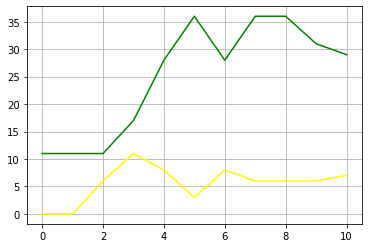

In [26]:
#tab = evolution_graph_nb_plantes(10, "vent", 10)
tab2 = evolution_graph_germes_plantes(10, "vent", 10)
#En vert : nb de plante
#En jaune : nb de germes

### Amélioration du modèle <br/>
**1ère idée : taux de germination** <br/>
La première amélioration repose sur le fait que certains germent, même dans de bonnes conditions, ne donneront pas "naissance" à un plante. <br/>
Pour notre parcelle, on supposera que l'espèce cultivée a un taux de germination (modifiable)2 de 75% (sur 100 germes, seuls 75 formeront une plantes)

In [27]:
def passage_jour_taux(parcelle, taille, taux_germination):
    #Simule le passage d'une journée sur la parcelle en tenant copte du taux de germination
    for i in range(0, taille):
        for j in range(0, taille):
            if parcelle[i][j][0] == 0.5 :
                reussite = random.random()
                if (reussite <= taux_germination) :
                    parcelle[i][j] = [1.0, " "]
                else :
                    tue_surface(parcelle, (i, j))
            elif 1.0 <= parcelle[i][j][0] < 2.0 :
                if parcelle[i][j][1] == " " or parcelle[i][j][1] == "V" :
                    parcelle[i][j][1] = "M"
                elif parcelle[i][j][1] == "M" :
                    parcelle[i][j][1] = "P"
                parcelle[i][j][0] += 0.25
            elif parcelle[i][j][0] == 2.0 :
                tue_surface(parcelle, (i,j))

In [28]:
def pollinisation_taux(taille, methode_polli, nb_jours, liste_coord_fleurs, taux_germination) :
    #Création de la parcelle
    liste_parcelles = []
    print("Jour 0 : \n")
    print("Etat initial de la parcelle : \n")
    parcelle = init_parcelle(taille)
    parcelle_remplie(parcelle, liste_coord_fleurs)
    print(parcelle)
    parcelle_0 = copy.deepcopy(parcelle)
    liste_parcelles.append(parcelle_0)
    print("\n")
    if methode_polli == "vent" :
        passage_jour_taux(parcelle, taille, taux_germination)
        print("Lors du premier jour, les plantes n'étant pas encore arrivée à maturité, la pollinisation par le vent n'est pas possible\n")
        print(parcelle)
        parcelle_j1 = copy.deepcopy(parcelle)
        liste_parcelles.append(parcelle_j1)
        print("\n")
        for j in range(nb_jours-1) :
            index_vent = int(input("Quelle est la force du vent ? "))
            sens = direction_alea_vent()
            dispersion_vent(parcelle, taille, sens, index_vent)
            passage_jour_taux(parcelle, taille, taux_germination)
            print("\n")
            print(parcelle)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            print("\n")
    elif methode_polli == "abeilles" :
        for j in range(nb_jours) :
            nb_abeilles = int(input("Combien d'abeilles y-aura-t'il ? "))
            pollinisation_abeilles(parcelle, taille, nb_abeilles)
            passage_jour_taux(parcelle, taille, taux_germination)
            print("\n")
            print(parcelle)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            print("\n")
    elif methode_polli == "humain" :
        for j in range(nb_jours) :
            liste_coor = []
            nb_surface = int(input("Combien de surfaces (<= 6) seront concernées ? "))
            for k in range(nb_surface) :
                x = int(input("Abscisse de la surface ? "))
                y = int(input("Ordonnée de la surface ? "))
                a = (x, y)
                liste_coor.append(a)
            pollinisation_humain(parcelle, taille, liste_coor)
            passage_jour_taux(parcelle, taille, taux_germination)
            print("\n")
            print(parcelle)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            print("\n")
    return liste_parcelles

In [29]:
def pollinisation_taux_ss_print(taille, methode_polli, nb_jours, liste_coord_fleurs, taux_germination) :
    #Création de la parcelle
    liste_parcelles = []
    parcelle = init_parcelle(taille)
    parcelle_remplie(parcelle, liste_coord_fleurs)
    parcelle_0 = copy.deepcopy(parcelle)
    liste_parcelles.append(parcelle_0)
    if methode_polli == "vent" :
        passage_jour_taux(parcelle, taille, taux_germination)
        parcelle_j1 = copy.deepcopy(parcelle)
        liste_parcelles.append(parcelle_j1)
        for j in range(nb_jours-1) :
            index_vent = int(input("Quelle est la force du vent ? "))
            sens = direction_alea_vent()
            dispersion_vent(parcelle, taille, sens, index_vent)
            passage_jour_taux(parcelle, taille, taux_germination)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
    elif methode_polli == "abeilles" :
        for j in range(nb_jours) :
            nb_abeilles = int(input("Combien d'abeilles y-aura-t'il ? "))
            pollinisation_abeilles(parcelle, taille, nb_abeilles)
            passage_jour_taux(parcelle, taille, taux_germination)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
    elif methode_polli == "humain" :
        for j in range(nb_jours) :
            liste_coor = []
            nb_surface = int(input("Combien de surfaces (<= 6) seront concernées ? "))
            for k in range(nb_surface) :
                x = int(input("Abscisse de la surface ? "))
                y = int(input("Ordonnée de la surface ? "))
                a = (x, y)
                liste_coor.append(a)
            pollinisation_humain(parcelle, taille, liste_coor)
            passage_jour_taux(parcelle, taille, taux_germination)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
    return liste_parcelles

In [30]:
def pollinisation_pre_jour_taux(taille, methode_polli, nb_jours, liste_coord_fleurs, taux_germination) :
    #Création de la parcelle
    liste_parcelles = []
    print("Jour 0 : \n")
    print("Etat initial de la parcelle : \n")
    parcelle = init_parcelle(taille)
    parcelle_remplie(parcelle, liste_coord_fleurs)
    print(parcelle)
    parcelle_0 = copy.deepcopy(parcelle)
    liste_parcelles.append(parcelle_0)
    print("\n")
    if methode_polli == "vent" :
        passage_jour_taux(parcelle, taille, taux_germination)
        print("Lors du premier jour, les plantes n'étant pas encore arrivée à maturité, la pollinisation par le vent n'est pas possible\n")
        print(parcelle)
        parcelle_j1 = copy.deepcopy(parcelle)
        liste_parcelles.append(parcelle_j1)
        print("\n")
        for j in range(nb_jours-1) :
            index_vent = int(input("Quelle est la force du vent ? "))
            sens = direction_alea_vent()
            dispersion_vent(parcelle, taille, sens, index_vent)
            print("\n")
            print(parcelle)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            passage_jour_taux(parcelle, taille, taux_germination)
            print("\n")
    elif methode_polli == "abeilles" :
        for j in range(nb_jours) :
            nb_abeilles = int(input("Combien d'abeilles y-aura-t'il ? "))
            pollinisation_abeilles(parcelle, taille, nb_abeilles)
            print("\n")
            print(parcelle)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            passage_jour_taux(parcelle, taille, taux_germination)
            print("\n")
    elif methode_polli == "humain" :
        for j in range(nb_jours) :
            liste_coor = []
            nb_surface = int(input("Combien de surfaces (<= 6) seront concernées ? "))
            for k in range(nb_surface) :
                x = int(input("Abscisse de la surface ? "))
                y = int(input("Ordonnée de la surface ? "))
                a = (x, y)
                liste_coor.append(a)
            pollinisation_humain(parcelle, taille, liste_coor)
            print("\n")
            print(parcelle)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            passage_jour_taux(parcelle, taille, taux_germination)
            print("\n")
    return liste_parcelles

In [31]:
def pollinisation_pre_jour_taux_ss_print(taille, methode_polli, nb_jours, liste_coord_fleurs, taux_germination) :
    #Création de la parcelle
    liste_parcelles = []
    parcelle = init_parcelle(taille)
    parcelle_remplie(parcelle, liste_coord_fleurs)
    parcelle_0 = copy.deepcopy(parcelle)
    liste_parcelles.append(parcelle_0)
    if methode_polli == "vent" :
        passage_jour_taux(parcelle, taille, taux_germination)
        parcelle_j1 = copy.deepcopy(parcelle)
        liste_parcelles.append(parcelle_j1)
        for j in range(nb_jours-1) :
            index_vent = int(input("Quelle est la force du vent ce jour ? "))
            sens = direction_alea_vent()
            dispersion_vent(parcelle, taille, sens, index_vent)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            passage_jour_taux(parcelle, taille, taux_germination)
    elif methode_polli == "abeilles" :
        for j in range(nb_jours) :
            nb_abeilles = int(input("Combien d'abeilles y-aura-t'il ce jour ? "))
            pollinisation_abeilles(parcelle, taille, nb_abeilles)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            passage_jour_taux(parcelle, taille, taux_germination)
    elif methode_polli == "humain" :
        for j in range(nb_jours) :
            liste_coor = []
            nb_surface = int(input("Combien de surfaces (<= 6) seront concernées ? "))
            for k in range(nb_surface) :
                x = int(input("Abscisse de la surface ? "))
                y = int(input("Ordonnée de la surface ? "))
                a = (x, y)
                liste_coor.append(a)
            pollinisation_humain(parcelle, taille, liste_coor)
            parcelle_j = copy.deepcopy(parcelle)
            liste_parcelles.append(parcelle_j)
            passage_jour_taux(parcelle, taille, taux_germination)
    return liste_parcelles

In [32]:
def evolution_graph_plantes_taux(taille, methode_polli, nb_jours) :
    #Ici j'ai utilisé des coordonnées calculées au hasard mais on peut évidemment entrer des coordonnées que l'on veut
    res = pollinisation_taux(taille, methode_polli, nb_jours, coordonnees_alea_plantes(random.randint(0, 50), taille), 0.1)
    l_nb_plantes_par_jour = []
    for i in range(len(res)) :
        l_nb_plantes_par_jour.append(compte_plantes(res[i], taille))
    plt.plot(l_nb_plantes_par_jour)
    return res

def evolution_graph_germes_plantes_taux(taille, methode_polli, nb_jours) :
    #Ici j'ai utilisé des coordonnées calculées au hasard mais on peut évidemment entrer des coordonnées que l'on veut
    res = pollinisation_pre_jour_taux_ss_print(taille, methode_polli, nb_jours, coordonnees_alea_plantes(random.randint(0, 50), taille), 0.50)
    l_nb_germes_par_jour = []
    l_nb_plantes_par_jour = []
    for i in range(len(res)) :
        l_nb_germes_par_jour.append(compte_germes(res[i], taille))
        l_nb_plantes_par_jour.append(compte_plantes(res[i], taille))
    plt.grid()
    plt.plot(l_nb_germes_par_jour, color = "yellow")
    plt.plot(l_nb_plantes_par_jour, color = "green")
    return res

def evolution_graph_germes_plantes_taux_bis(taille, methode_polli, nb_jours) :
    #Ici j'ai utilisé des coordonnées calculées au hasard mais on peut évidemment entrer des coordonnées que l'on veut
    res = pollinisation_pre_jour_taux_ss_print(taille, methode_polli, nb_jours, coordonnees_alea_plantes(random.randint(0, 50), taille), 0.50)
    l_nb_germes_par_jour = []
    l_nb_plantes_par_jour = []
    for i in range(len(res)) :
        l_nb_germes_par_jour.append(compte_germes(res[i], taille))
        l_nb_plantes_par_jour.append(compte_plantes(res[i], taille))
    plt.grid()
    return [l_nb_plantes_par_jour, l_nb_germes_par_jour]

Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il ce jour ? 10
Combien d'abeilles y-aura-t'il c

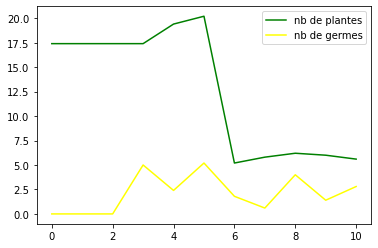

In [33]:
exp1 = evolution_graph_germes_plantes_taux_bis(10, "abeilles", 10)
exp2 = evolution_graph_germes_plantes_taux_bis(10, "abeilles", 10)
exp3 = evolution_graph_germes_plantes_taux_bis(10, "abeilles", 10)
exp4 = evolution_graph_germes_plantes_taux_bis(10, "abeilles", 10)
exp5 = evolution_graph_germes_plantes_taux_bis(10, "abeilles", 10)
simulation_vent_taux_p = np.add(exp1[0], exp2[0])
simulation_vent_taux_p = np.add(simulation_vent_taux_p, exp3[0])
simulation_vent_taux_p = np.add(simulation_vent_taux_p, exp4[0])
simulation_vent_taux_p = np.add(simulation_vent_taux_p, exp5[0])
simulation_vent_taux_g = np.add(exp1[1], exp2[1])
simulation_vent_taux_g = np.add(simulation_vent_taux_g, exp3[1])
simulation_vent_taux_g = np.add(simulation_vent_taux_g, exp4[1])
simulation_vent_taux_g = np.add(simulation_vent_taux_g, exp5[1])
resultats_p = [simulation_vent_taux_p[i]/5 for i in range(len(simulation_vent_taux_p))]
resultats_g = [simulation_vent_taux_g[i]/5 for i in range(len(simulation_vent_taux_g))]

plt.plot(resultats_p, color = "green", label = 'nb de plantes')
plt.plot(resultats_g, color = "yellow", label = 'nb de germes')
plt.grid()
plt.legend()

In [34]:
#def pollinisation_double_pre_jour_taux_ss_print(taille, methode_polli_1, methode_polli_2, nb_jours, liste_coord_fleurs, taux_germination) :
#   #Création de la parcelle
#    liste_parcelles = []
#    parcelle = init_parcelle(taille)
#    parcelle_remplie(parcelle, liste_coord_fleurs)
#    parcelle_0 = copy.deepcopy(parcelle)
#    liste_parcelles.append(parcelle_0)
#    if methode_polli_1 == "vent" :
#        passage_jour_taux(parcelle, taille, taux_germination)
#        parcelle_j1 = copy.deepcopy(parcelle)
#        liste_parcelles.append(parcelle_j1)
#        for j in range(nb_jours-1) :
#            index_vent = int(input("Quelle est la force du vent ce jour ? "))
#            sens = direction_alea_vent()
#            dispersion_vent(parcelle, taille, sens, index_vent)
#            parcelle_j = copy.deepcopy(parcelle)
#            liste_parcelles.append(parcelle_j)
#            passage_jour_taux(parcelle, taille, taux_germination)
#    elif methode_polli == "abeilles" :
#        for j in range(nb_jours) :
#            nb_abeilles = int(input("Combien d'abeilles y-aura-t'il ce jour ? "))
#            pollinisation_abeilles(parcelle, taille, nb_abeilles)
#            parcelle_j = copy.deepcopy(parcelle)
#            liste_parcelles.append(parcelle_j)
#            passage_jour_taux(parcelle, taille, taux_germination)
#    elif methode_polli == "humain" :
#        for j in range(nb_jours) :
#            liste_coor = []
#            nb_surface = int(input("Combien de surfaces (<= 6) seront concernées ? "))
#            for k in range(nb_surface) :
#                x = int(input("Abscisse de la surface ? "))
#                y = int(input("Ordonnée de la surface ? "))
#                a = (x, y)
#                liste_coor.append(a)
#            pollinisation_humain(parcelle, taille, liste_coor)
#            parcelle_j = copy.deepcopy(parcelle)
#            liste_parcelles.append(parcelle_j)
#            passage_jour_taux(parcelle, taille, taux_germination)
#    return liste_parcelles

In [46]:
def multi_polli_taux(taille, methode_polli_1, methode_polli_2, nb_jours, liste_coord_fleurs, taux_germination) :
    liste_parcelles = []
    parcelle = init_parcelle(taille)
    parcelle_remplie(parcelle, liste_coord_fleurs)
    parcelle_j0 = copy.deepcopy(parcelle)
    liste_parcelles.append(parcelle_j0)
    for i in range(nb_jours) :
        if methode_polli_1 == "vent" and not(bool_parcelle_sans_plantes_matures(parcelle, taille)) :
            parcelle = polli_jour_unique(parcelle, taille, methode_polli_1)
        parcelle = polli_jour_unique(parcelle, taille, methode_polli_2)
        passage_jour_taux(parcelle, taille, taux_germination)
        parcelle_j = copy.deepcopy(parcelle)
        liste_parcelles.append(parcelle_j)
    return liste_parcelles

In [47]:
def multi_polli_graph_germes_plantes_taux_bis(taille, methode_polli_1, methode_polli_2, nb_jours) :
    res = multi_polli_taux(taille, methode_polli_1, methode_polli_2, nb_jours, coordonnees_alea_plantes(random.randint(0, 50), taille), 0.50)
    l_nb_germes_par_jour = []
    l_nb_plantes_par_jour = []
    for i in range(len(res)) :
        l_nb_germes_par_jour.append(compte_germes(res[i], taille))
        l_nb_plantes_par_jour.append(compte_plantes(res[i], taille))
    plt.grid()
    return [l_nb_plantes_par_jour, l_nb_germes_par_jour]

Combien d'abeilles y-aura-t'il ? 3
Quelle est la force du vent ? 7
Combien d'abeilles y-aura-t'il ? 3
Quelle est la force du vent ? 7
Combien d'abeilles y-aura-t'il ? 3
Quelle est la force du vent ? 7
Combien d'abeilles y-aura-t'il ? 3
Quelle est la force du vent ? 7
Combien d'abeilles y-aura-t'il ? 3
Quelle est la force du vent ? 7
Combien d'abeilles y-aura-t'il ? 3
Quelle est la force du vent ? 7
Combien d'abeilles y-aura-t'il ? 3
Quelle est la force du vent ? 7
Combien d'abeilles y-aura-t'il ? 3
Quelle est la force du vent ? 7
Combien d'abeilles y-aura-t'il ? 3
Quelle est la force du vent ? 7
Combien d'abeilles y-aura-t'il ? 3
Combien d'abeilles y-aura-t'il ? 3
Quelle est la force du vent ? 7
Combien d'abeilles y-aura-t'il ? 3
Quelle est la force du vent ? 7
Combien d'abeilles y-aura-t'il ? 3
Quelle est la force du vent ? 7
Combien d'abeilles y-aura-t'il ? 3
Quelle est la force du vent ? 7
Combien d'abeilles y-aura-t'il ? 3
Quelle est la force du vent ? 7
Combien d'abeilles y-aura-t

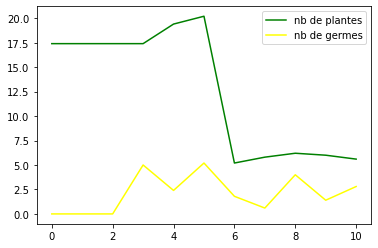

In [53]:
exp1 = multi_polli_graph_germes_plantes_taux_bis(10, "vent", "abeilles", 10)
exp2 = multi_polli_graph_germes_plantes_taux_bis(10, "vent", "abeilles", 10)
exp3 = multi_polli_graph_germes_plantes_taux_bis(10, "vent", "abeilles", 10)
exp4 = multi_polli_graph_germes_plantes_taux_bis(10, "vent", "abeilles", 10)
exp5 = multi_polli_graph_germes_plantes_taux_bis(10, "vent", "abeilles", 10)
simulation_multi_taux_p = np.add(exp1[0], exp2[0])
simulation_multi_taux_p = np.add(simulation_vent_taux_p, exp3[0])
simulation_multi_taux_p = np.add(simulation_vent_taux_p, exp4[0])
simulation_multi_taux_p = np.add(simulation_vent_taux_p, exp5[0])
simulation_multi_taux_g = np.add(exp1[1], exp2[1])
simulation_multi_taux_g = np.add(simulation_vent_taux_g, exp3[1])
simulation_multi_taux_g = np.add(simulation_vent_taux_g, exp4[1])
simulation_multi_taux_g = np.add(simulation_vent_taux_g, exp5[1])
resultats_multi_p = [simulation_multi_taux_p[i]/5 for i in range(len(simulation_multi_taux_p))]
resultats_multi_g = [simulation_multi_taux_g[i]/5 for i in range(len(simulation_multi_taux_g))]

plt.plot(resultats_multi_p, color = "green", label = 'nb de plantes')
plt.plot(resultats_multi_g, color = "yellow", label = 'nb de germes')
plt.grid()
plt.legend()